In [188]:
#NB
# THIS CODE WAS PARTLY BASED ON THE SKLEARN RANDOM FOREST CLASSIFIER TUTORIAL https://www.youtube.com/watch?v=x9pIM2GkbF4

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [189]:
data0 = pd.read_csv('notext.csv')
data1 = pd.read_csv('text.csv')

#data3 = pd.read_csv('test_notext.csv)
# create training data
data = pd.concat([data0, data1])

In [190]:
data.head()

Unnamed: 0    1         2         3         4         5         6  \
640         641  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
641         642  0.0  0.458824  0.000000  0.462745  0.019608  1.000000   
642         643  0.0  0.047059  0.000000  0.050980  0.160784  0.156863   
643         644  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
644         645  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
645         646  0.0  0.054902  0.000000  0.000000  0.000000  0.168627   
646         647  0.0  0.180392  0.223529  0.098039  0.129412  0.054902   
647         648  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
648         649  0.0  0.015686  0.019608  0.039216  0.039216  0.019608   
649         650  0.0  0.109804  0.101961  0.035294  0.062745  0.180392   
650         651  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
651         652  0.0  0.015686  0.050980  0.145098  0.247059  0.254902   
652         653  0.0  0.000000  0.207843  0.000000  0.117647  0.149020   
653         654  0.0  0.000000  0.203922  0.286275  0.000000  1.000000   
654         655  0.0  0.000000  0.000000  1.000000  0.000000  0.000000   
655         656  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
656         657  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
657         658  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
658         659  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
659         660  0.0  0.243137  0.117647  0.631373  1.000000  0.000000   
660         661  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
661         662  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
662         663  0.0  0.000000  0.000000  0.000000  0.000000  0.113725   
663         664  0.0  0.000000  0.000000  0.098039  0.160784  0.172549   
664         665  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
665         666  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
666         667  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
667         668  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
668         669  0.0  0.513725  0.066667  0.000000  0.000000  0.000000   
669         670  0.0  0.282353  0.000000  1.000000  0.000000  0.117647   
670         671  0.0  0.000000  0.000000  0.082353  0.000000  1.000000   
671         672  0.0  0.000000  0.666667  0.000000  0.000000  0.674510   
672         673  0.0  1.000000  0.000000  0.360784  0.000000  0.000000   
673         674  0.0  0.000000  0.000000  0.133333  0.000000  0.262745   
674         675  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
675         676  0.0  0.258824  0.000000  0.043137  0.145098  0.094118   
676         677  0.0  0.192157  0.050980  0.050980  0.168627  0.160784   
677         678  0.0  0.003922  0.003922  0.003922  0.011765  0.007843   
678         679  0.0  0.172549  0.168627  0.086275  0.007843  0.023529   
679         680  0.0  0.101961  0.094118  0.078431  0.074510  0.066667   
680         681  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
681         682  0.0  0.043137  0.011765  0.019608  0.011765  0.011765   
682         683  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
683         684  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
684         685  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
685         686  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
686         687  0.0  0.000000  0.058824  0.129412  0.192157  0.039216   
687         688  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
688         689  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
689         690  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   

            7         8         9        10        11        12        13  \
640  0.000000  0.152941  0.278431  0.321569  1.000000  0.000000  0.023529   
641  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   

In [191]:
data.tail()

Unnamed: 0    1         2         3         4         5         6  \
0           1  0.0  0.058824  0.066667  0.184314  0.176471  0.223529   
1           2  0.0  0.047059  0.058824  0.121569  0.466667  0.098039   
2           3  0.0  0.031373  0.043137  0.180392  0.384314  0.031373   
3           4  0.0  0.066667  0.054902  0.039216  0.027451  0.039216   
4           5  0.0  0.301961  0.478431  0.337255  0.054902  0.145098   

          7         8         9        10        11        12        13  \
0  0.294118  0.129412  0.149020  0.160784  0.129412  0.121569  0.109804   
1  0.137255  0.117647  0.066667  0.258824  0.215686  0.066667  0.235294   
2  0.039216  0.035294  0.054902  0.074510  0.066667  0.035294  0.023529   
3  0.082353  0.070588  0.141176  0.117647  0.082353  0.066667  0.188235   
4  0.047059  0.160784  0.196078  0.105882  0.090196  0.105882  0.074510   

         14        15        16        17        18        19        20  \
0  0.101961  0.082353  0.090196  0.090196  0.094118  0.090196  0.098039   
1  0.137255  0.015686  0.082353  0.149020  0.113725  0.133333  0.125490   
2  0.015686  0.007843  0.035294  0.015686  0.000000  0.050980  0.105882   
3  0.066667  0.094118  0.400000  0.576471  0.396078  0.572549  0.298039   
4  0.035294  0.164706  0.137255  0.113725  0.203922  0.047059  0.011765   

         21        22        23        24        25        26        27  \
0  0.074510  0.082353  0.066667  0.109804  0.062745  0.196078  0.298039   
1  0.117647  0.113725  0.086275  0.101961  0.066667  0.082353  0.133333   
2  0.023529  0.062745  0.054902  0.011765  0.003922  0.019608  0.094118   
3  0.356863  0.866667  0.423529  0.600000  0.396078  0.282353  0.490196   
4  0.325490  0.933333  0.960784  0.898039  0.576471  0.686275  0.509804   

         28        29        30        31        32        33        34  \
0  0.176471  0.094118  0.058824  0.066667  0.043137  0.239216  0.415686   
1  0.047059  0.337255  0.156863  0.070588  0.090196  0.105882  0.145098   
2  0.125490  0.015686  0.015686  0.007843  0.035294  0.078431  0.101961   
3  0.435294  0.541176  0.400000  0.482353  0.756863  0.396078  0.313725   
4  0.270588  0.043137  0.247059  0.109804  0.007843  0.082353  0.015686   

         35        36        37        38        39        40        41  \
0  0.121569  0.094118  0.074510  0.066667  0.223529  0.200000  0.294118   
1  0.137255  0.019608  0.054902  0.160784  0.270588  0.341176  0.376471   
2  0.007843  0.035294  0.098039  0.188235  0.709804  0.486275  0.219608   
3  0.352941  0.121569  0.027451  0.109804  0.019608  0.062745  0.109804   
4  0.023529  0.019608  0.015686  0.007843  0.019608  0.007843  0.000000   

         42        43        44        45        46        47        48  \
0  0.160784  0.070588  0.129412  0.066667  0.207843  0.105882  0.043137   
1  0.431373  0.341176  0.094118  0.098039  0.090196  0.329412  0.294118   
2  0.141176  0.490196  0.858824  0.850980  0.658824  0.427451  0.247059   
3  0.121569  0.023529  0.184314  0.078431  0.003922  0.054902  0.039216   
4  0.003922  0.003922  0.000000  0.007843  0.011765  0.003922  0.011765   

         49        50        51        52        53        54        55  \
0  0.066667  0.101961  0.058824  0.058824  0.058824  0.058824  0.133333   
1  0.137255  0.231373  0.098039  0.090196  0.074510  0.054902  0.066667   
2  0.298039  0.341176  0.243137  0.176471  0.443137  0.501961  0.505882   
3  0.000000  0.015686  0.003922  0.015686  0.062745  0.054902  0.007843   
4  0.003922  0.015686  0.015686  0.039216  0.047059  0.149020  0.254902   

         56        57        58        59        60        61        62  \
0  0.074510  0.082353  0.086275  0.105882  0.098039  0.101961  0.109804   
1  0.050980  0.121569  0.266667  0.172549  0.015686  0.039216  0.027451   
2  0.317647  0.313725  0.231373  0.250980  0.180392  0.305882  0.235294   
3  0.019608  0.019608  0.011765  0.000000  0.015686  0.031373  0.035294   
4  0.325490  0.305882  0.396078  0.349

In [192]:
# select a flattened pixel block to test process
a = data.iloc[641,:-2].values

In [193]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [194]:
# turn back into 2D block
import math
# size of block will be n times n
n = 128
a = a.astype('float')
a = a.reshape(n,n, order='C')
print(a)
print(a.shape)

128
[[6.42000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.84313725e-02 0.00000000e+00
  1.56862745e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.01960784e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.13725490e-02
  0.00000000e+00 0.00000000e+00 3.13725490e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 4.78431373e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 3.88235294e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.64705882e-01 7.45098039e-02
  1.41176471e-01 1.33333333e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 5.09803922e-02 3.52941176e-02
  6.

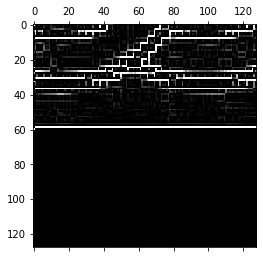

In [195]:
# show image
import matplotlib.cm as cm
plt.matshow(a, cmap='gray', vmin = 0, vmax=1)

In [196]:
df_x = data.iloc[:,:-1]
df_y = data.iloc[:,-1]

In [210]:
df_y

0      0
1      0
2      0
3      0
4      0
      ..
685    1
686    1
687    1
688    1
689    1
Name: label, Length: 1350, dtype: int64

In [211]:
test_data0 = pd.read_csv('test_notext.csv')
test_data1 = pd.read_csv('test_text.csv')
test_data = pd.concat([test_data0, test_data1])

In [212]:
# create training and testing data
# train data
x_train = data.iloc[:,:-1]
# train labels 
y_train = data.iloc[:,-1]
# test data
x_test = test_data.iloc[:,:-1]
# test labels
y_test = test_data.iloc[:,-1]

In [213]:
x_train.head()

Unnamed: 0    1         2         3         4         5         6  \
0           1  0.0  0.058824  0.066667  0.184314  0.176471  0.223529   
1           2  0.0  0.047059  0.058824  0.121569  0.466667  0.098039   
2           3  0.0  0.031373  0.043137  0.180392  0.384314  0.031373   
3           4  0.0  0.066667  0.054902  0.039216  0.027451  0.039216   
4           5  0.0  0.301961  0.478431  0.337255  0.054902  0.145098   

          7         8         9        10        11        12        13  \
0  0.294118  0.129412  0.149020  0.160784  0.129412  0.121569  0.109804   
1  0.137255  0.117647  0.066667  0.258824  0.215686  0.066667  0.235294   
2  0.039216  0.035294  0.054902  0.074510  0.066667  0.035294  0.023529   
3  0.082353  0.070588  0.141176  0.117647  0.082353  0.066667  0.188235   
4  0.047059  0.160784  0.196078  0.105882  0.090196  0.105882  0.074510   

         14        15        16        17        18        19        20  \
0  0.101961  0.082353  0.090196  0.090196  0.094118  0.090196  0.098039   
1  0.137255  0.015686  0.082353  0.149020  0.113725  0.133333  0.125490   
2  0.015686  0.007843  0.035294  0.015686  0.000000  0.050980  0.105882   
3  0.066667  0.094118  0.400000  0.576471  0.396078  0.572549  0.298039   
4  0.035294  0.164706  0.137255  0.113725  0.203922  0.047059  0.011765   

         21        22        23        24        25        26        27  \
0  0.074510  0.082353  0.066667  0.109804  0.062745  0.196078  0.298039   
1  0.117647  0.113725  0.086275  0.101961  0.066667  0.082353  0.133333   
2  0.023529  0.062745  0.054902  0.011765  0.003922  0.019608  0.094118   
3  0.356863  0.866667  0.423529  0.600000  0.396078  0.282353  0.490196   
4  0.325490  0.933333  0.960784  0.898039  0.576471  0.686275  0.509804   

         28        29        30        31        32        33        34  \
0  0.176471  0.094118  0.058824  0.066667  0.043137  0.239216  0.415686   
1  0.047059  0.337255  0.156863  0.070588  0.090196  0.105882  0.145098   
2  0.125490  0.015686  0.015686  0.007843  0.035294  0.078431  0.101961   
3  0.435294  0.541176  0.400000  0.482353  0.756863  0.396078  0.313725   
4  0.270588  0.043137  0.247059  0.109804  0.007843  0.082353  0.015686   

         35        36        37        38        39        40        41  \
0  0.121569  0.094118  0.074510  0.066667  0.223529  0.200000  0.294118   
1  0.137255  0.019608  0.054902  0.160784  0.270588  0.341176  0.376471   
2  0.007843  0.035294  0.098039  0.188235  0.709804  0.486275  0.219608   
3  0.352941  0.121569  0.027451  0.109804  0.019608  0.062745  0.109804   
4  0.023529  0.019608  0.015686  0.007843  0.019608  0.007843  0.000000   

         42        43        44        45        46        47        48  \
0  0.160784  0.070588  0.129412  0.066667  0.207843  0.105882  0.043137   
1  0.431373  0.341176  0.094118  0.098039  0.090196  0.329412  0.294118   
2  0.141176  0.490196  0.858824  0.850980  0.658824  0.427451  0.247059   
3  0.121569  0.023529  0.184314  0.078431  0.003922  0.054902  0.039216   
4  0.003922  0.003922  0.000000  0.007843  0.011765  0.003922  0.011765   

         49        50        51        52        53        54        55  \
0  0.066667  0.101961  0.058824  0.058824  0.058824  0.058824  0.133333   
1  0.137255  0.231373  0.098039  0.090196  0.074510  0.054902  0.066667   
2  0.298039  0.341176  0.243137  0.176471  0.443137  0.501961  0.505882   
3  0.000000  0.015686  0.003922  0.015686  0.062745  0.054902  0.007843   
4  0.003922  0.015686  0.015686  0.039216  0.047059  0.149020  0.254902   

         56        57        58        59        60        61        62  \
0  0.074510  0.082353  0.086275  0.105882  0.098039  0.101961  0.109804   
1  0.050980  0.121569  0.266667  0.172549  0.015686  0.039216  0.027451   
2  0.317647  0.313725  0.231373  0.250980  0.180392  0.305882  0.235294   
3  0.019608  0.019608  0.011765  0.000000  0.015686  0.031373  0.035294   
4  0.325490  0.305882  0.396078  0.349

In [214]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [215]:
# specify classifier and choose amount of trees
rf=RandomForestClassifier(n_estimators = 1000)

In [216]:
# fit model
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [227]:
# save the model to disk
import joblib
filename = 'RandomForestmodel.sav'
joblib.dump(rf, filename)

['RandomForestmodel.sav']

In [217]:
y_test

0     0
1     0
2     0
3     0
4     0
     ..
20    1
21    1
22    1
23    1
24    1
Name: label, Length: 1000, dtype: int64

In [218]:
# make predictions for testing data
pred = rf.predict(x_test)

In [219]:
pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [220]:
# golden labels
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [221]:
s = y_test.values
count=0

In [222]:
for i in range(len(pred)):
    if pred[i] == s[i]:
        count = count+1


In [223]:
# accuracy over test set
count/len(pred)

0.896